In [1]:
import pandas as pd
import requests
import zipfile
import io
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../Data/ny_od_main_JT00_2019.csv.gz')
df

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,360010001001004,360010002004006,1,1,0,0,0,0,1,0,0,1,20211018
1,360010001001004,360930320001020,1,0,1,0,0,0,1,0,0,1,20211018
2,360010001001005,360010002003009,1,1,0,0,0,0,1,1,0,0,20211018
3,360010001001005,360010007003002,1,0,1,0,0,0,1,1,0,0,20211018
4,360010001001005,360010021002003,1,0,0,1,0,0,1,0,1,0,20211018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7836552,361231505004020,361231505003007,1,0,1,0,0,1,0,0,1,0,20211018
7836553,361231505004020,361231505003010,1,0,1,0,0,0,1,0,1,0,20211018
7836554,361231505004020,361231505003016,1,0,0,1,0,1,0,0,1,0,20211018
7836555,361231505004023,360550113012014,1,0,0,1,0,0,1,0,0,1,20211018


In [3]:
df['h_geocode_ct']=df.h_geocode.astype(str).str[:-4].astype(int) #aggregate from CBG to Census tract
df['w_geocode_ct']=df.w_geocode.astype(str).str[:-4].astype(int)
OD_df=df[['h_geocode_ct','w_geocode_ct','S000']].groupby(['h_geocode_ct','w_geocode_ct']).sum().unstack()
OD_df.columns=OD_df.columns.droplevel(0)
OD_df=OD_df.fillna(0)
OD_df

w_geocode_ct,36001000100,36001000200,36001000300,36001000401,36001000403,36001000404,36001000501,36001000502,36001000600,36001000700,...,36121970700,36121970800,36121970900,36121971000,36121971100,36123150100,36123150200,36123150300,36123150400,36123150500
h_geocode_ct,,,,,,,,,,,,,,,,,,,,,
36001000100,17.0,26.0,31.0,21.0,13.0,0.0,3.0,7.0,7.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36001000200,19.0,77.0,77.0,58.0,26.0,0.0,18.0,8.0,8.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36001000300,9.0,26.0,117.0,70.0,55.0,7.0,12.0,19.0,13.0,54.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
36001000401,2.0,16.0,24.0,41.0,45.0,7.0,3.0,5.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36001000403,8.0,23.0,57.0,64.0,114.0,8.0,20.0,14.0,17.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36123150100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,7.0,0.0,423.0,190.0,8.0,47.0,153.0
36123150200,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,128.0,505.0,42.0,197.0,209.0
36123150300,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,8.0,0.0,25.0,144.0,157.0,54.0,58.0


In [4]:
# OD_df.to_csv('../Data/OD_alljobs.csv') #dataframe of O-D commutes

In [5]:
CBD_df=df[['w_geocode_ct','S000']].groupby(['w_geocode_ct']).sum()
CBD_df.head() #of people who commute to each census tract

,S000
w_geocode_ct,
36001000100,1452
36001000200,3064
36001000300,11220
36001000401,9036
36001000403,10752


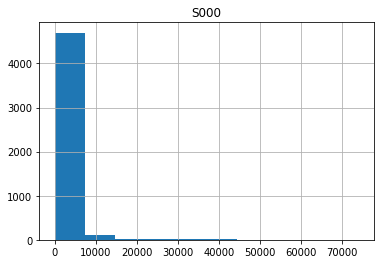

In [6]:
CBD_df.hist(); #histogram of total # of jobs

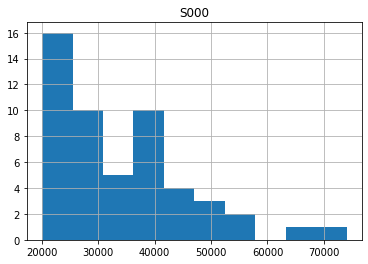

In [7]:
CBD_df[CBD_df['S000']>20000].hist(); # hist zoomed in to CTs with over 20,000 jobs

In [8]:
# url = 'http://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_36_tract_500k.zip'
# local_path = 'geo_files/'
# print('Downloading shapefile...')
# r = requests.get(url)
# z = zipfile.ZipFile(io.BytesIO(r.content))
# print("Done")
# z.extractall(path=local_path) # extract to folder
# filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 

# dbf, prj, shp, shx = [filename for filename in filenames]

county = gpd.read_file('../Data/geo_files/cb_2020_36_tract_500k.shp')
print("Shape of the dataframe: {}".format(county.shape))
print("Projection of dataframe: {}".format(county.crs))

nyc_CT=county[county.NAMELSADCO.isin(['Bronx County','Kings County', 'Queens County','New York County'])]
nyc_CT.set_crs(4269,allow_override=True)
nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
nyc_CT.head(n=2)
nyc_CT.GEOID=nyc_CT.GEOID.astype(int)

Shape of the dataframe: (5394, 14)
Projection of dataframe: epsg:4269


<ipython-input-8-17050e5915b3>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
/Users/callieclark/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [9]:
nyc_cbd=CBD_df.merge(nyc_CT,how='right',left_on='w_geocode_ct',right_on='GEOID') #merge LEHD data with geodata
nyc_cbd['S000_area_norm']=nyc_cbd['S000']/nyc_cbd['ALAND'] #create jobs/area variable to normalize
nyc_cbd=nyc_cbd.sort_values(by='S000_area_norm',ascending=False)
nyc_cbd = gpd.GeoDataFrame(nyc_cbd, geometry='geometry')
print('Total Jobs: ',nyc_cbd['S000'].sum())

Total Jobs:  3520137.0


In [10]:
nyc_cbd.head()

,S000,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry,centroid,S000_area_norm
1899,74028.0,36,061,010900,1400000US36061010900,36061010900,109,Census Tract 109,NY,New York County,New York,CT,175741,0,"POLYGON ((-73.99298 40.75285, -73.99253 40.753...",POINT (-73.98970 40.75225),0.421234
1012,67041.0,36,047,001100,1400000US36047001100,36047001100,11,Census Tract 11,NY,Kings County,New York,CT,168507,0,"POLYGON ((-73.99045 40.69373, -73.99066 40.694...",POINT (-73.98771 40.69329),0.397853
117,52535.0,36,061,011900,1400000US36061011900,36061011900,119,Census Tract 119,NY,New York County,New York,CT,177591,0,"POLYGON ((-73.98930 40.75791, -73.98884 40.758...",POINT (-73.98602 40.75732),0.295820
1785,51265.0,36,061,010100,1400000US36061010100,36061010100,101,Census Tract 101,NY,New York County,New York,CT,175520,0,"POLYGON ((-73.99484 40.75029, -73.99395 40.751...",POINT (-73.99154 40.74973),0.292075
572,41809.0,36,061,009400,1400000US36061009400,36061009400,94,Census Tract 94,NY,New York County,New York,CT,152754,0,"POLYGON ((-73.98040 40.75415, -73.97994 40.754...",POINT (-73.97775 40.75523),0.273702


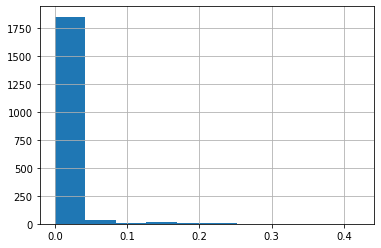

In [11]:
nyc_cbd['S000_area_norm'].hist();

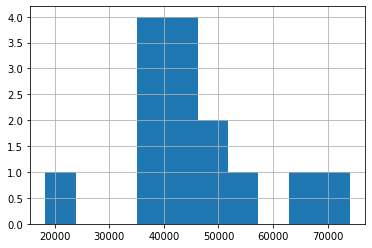

In [12]:
nyc_cbd[nyc_cbd['S000_area_norm']>0.2]['S000'].hist();

In [13]:
#five CBDs
jobs_in_cbd=nyc_cbd.head(n=5)['S000'].sum()
print('Percent of Jobs in 5 CBDS',jobs_in_cbd/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in 5 CBDS 8.143944397618617 %


In [14]:
#10 CBDs
jobs_in_cbd=nyc_cbd.head(n=10)['S000'].sum()
print('Percent of Jobs in 10 CBDS',jobs_in_cbd/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in 10 CBDS 13.636202227356492 %


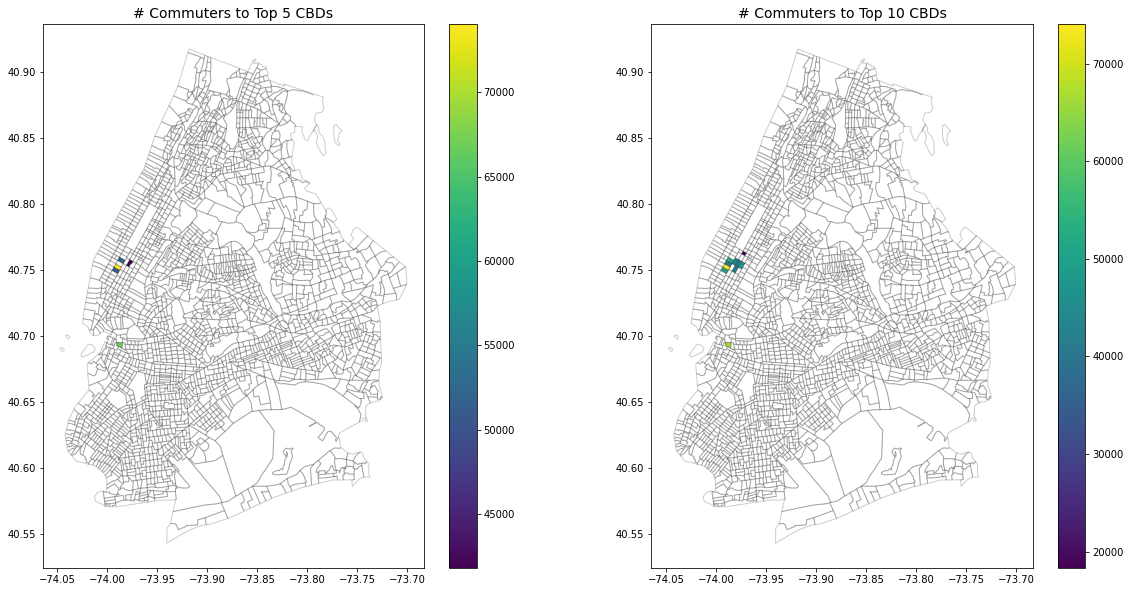

In [15]:
fig,(ax1,ax2)=plt.subplots(ncols=(2),nrows=(1),figsize=(20,10)) #standardize scale!!
nyc_cbd.head(n=5).plot(ax=ax1, column='S000', legend=True)
nyc_CT.plot(ax=ax1,color='none',alpha=0.2)

nyc_cbd.head(n=10).plot(ax=ax2, column='S000', legend=True)
nyc_CT.plot(ax=ax2,color='none',alpha=0.2)
ax1.set_title('# Commuters to Top 5 CBDs',fontsize=14);
ax2.set_title('# Commuters to Top 10 CBDs',fontsize=14);

In [16]:
#CBDS with over 15,000 jobs
print('Percent of Jobs in CBDS with over 15,000 jobs',nyc_cbd[nyc_cbd['S000']>15000]['S000'].sum()/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in CBDS with over 15,000 jobs 40.502202044977224 %


In [17]:
#CBDS with over 15,000 jobs
print('Percent of Jobs in CBDS with density > 0.2 jobs/m^2 ',nyc_cbd[nyc_cbd['S000_area_norm']>0.2]['S000'].sum()/nyc_cbd['S000'].sum()*100,'%')

Percent of Jobs in CBDS with density > 0.2 jobs/m^2  18.029980083161536 %


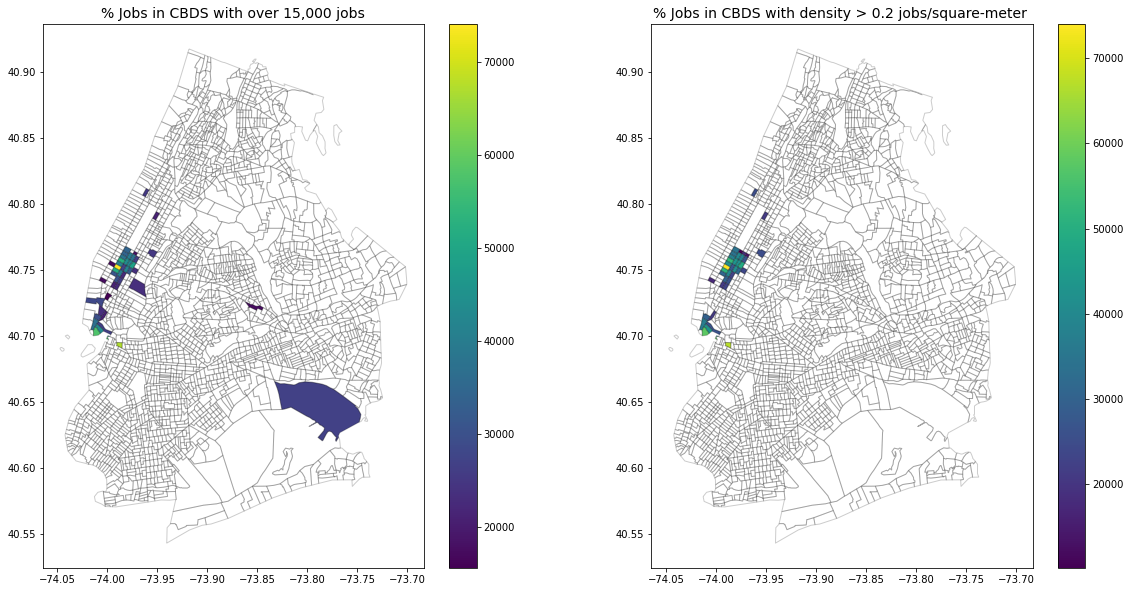

In [18]:


fig,(ax1,ax2)=plt.subplots(ncols=(2),nrows=(1),figsize=(20,10)) #standardize scale!!
nyc_cbd[nyc_cbd['S000']>15000].plot(ax=ax1, column='S000', legend=True)
nyc_CT.plot(ax=ax1,color='none',alpha=0.2)

nyc_cbd[nyc_cbd['S000_area_norm']>0.1].plot(ax=ax2, column='S000', legend=True)
nyc_CT.plot(ax=ax2,color='none',alpha=0.2)
ax1.set_title('% Jobs in CBDS with over 15,000 jobs',fontsize=14);
ax2.set_title('% Jobs in CBDS with density > 0.2 jobs/square-meter ',fontsize=14);

In [19]:
#nyc_cbd[['GEOID','S000','geometry', 'centroid']].head(n=10).to_csv('Top_10_CBDs.csv')